In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix



In [62]:
# Load Data
df = pd.read_csv('/Users/hilmanyusoh/Desktop/Credit-Scoring-System/data/ibank_dataset.csv')

# ดูภาพรวมข้อมูล
print("--- [Data Summary] ---")
print(df.info())
print("\n--- [Missing Values] ---")
print(df.isnull().sum())
display(df.head())

--- [Data Summary] ---
<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   member_id                  500 non-null    str  
 1   first_name                 500 non-null    str  
 2   age                        500 non-null    int64
 3   gender                     500 non-null    str  
 4   owns_car                   500 non-null    str  
 5   owns_house                 500 non-null    str  
 6   no_of_children             500 non-null    int64
 7   total_family_members       500 non-null    int64
 8   occupation_type            500 non-null    str  
 9   employment_status          500 non-null    str  
 10  migrant_worker             500 non-null    str  
 11  province                   500 non-null    str  
 12  net_yearly_income          500 non-null    int64
 13  net_monthly_income         500 non-null    int64
 14  yearly_debt_pa

,member_id,first_name,age,gender,owns_car,owns_house,no_of_children,total_family_members,occupation_type,employment_status,...,credit_limit_used_pct,credit_score,prev_defaults,default_in_last_6months,npl_status,mou_status,mou_agreement_id,payroll_deduction_consent,account_tenure_months,registration_date
0,ID2026000,Member_1,54,ชาย,Y,N,3,5,เภสัชกร,พนักงานตามสัญญาจ้าง,...,14,594,0,N,ปกติ,Inactive,MOU-2026-795,N,38,2023-10-11
1,ID2026001,Member_2,44,หญิง,Y,N,0,5,พนักงานการประปา,พนักงานตามสัญญาจ้าง,...,82,616,0,N,ค้างชำระเล็กน้อย,Inactive,MOU-2026-532,Y,63,2022-09-20
2,ID2026002,Member_3,29,หญิง,N,N,2,4,นักวิชาการตรวจสอบภายใน,พนักงานตามสัญญาจ้าง,...,16,350,2,Y,ค้างชำระเล็กน้อย,Inactive,MOU-2026-245,N,41,2021-03-28
3,ID2026003,Member_4,51,หญิง,N,N,2,5,เภสัชกร,พนักงานตามสัญญาจ้าง,...,34,309,0,Y,ค้างชำระเล็กน้อย,Inactive,MOU-2026-468,Y,45,2022-02-13
4,ID2026004,Member_5,54,หญิง,N,Y,2,3,ผู้จัดการโรงงาน,พนักงานตามสัญญาจ้าง,...,100,827,1,N,ปกติ,Inactive,MOU-2026-962,N,20,2022-05-14


Cell 2: Exploratory Data Analysis (EDA)

/var/folders/by/j89gc0qj6_zfzkf42sg0dr1c0000gp/T/ipykernel_7063/1022739232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='npl_status', data=df, palette='viridis')
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
/Users/hilmanyusoh/Desktop/Credit-Scoring-System/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Desktop/Credit-Scoring-System/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hilmanyusoh/Desktop/Credit-Scoring-System/venv/lib/python3.13/site-packages/IPython/core/pylabt

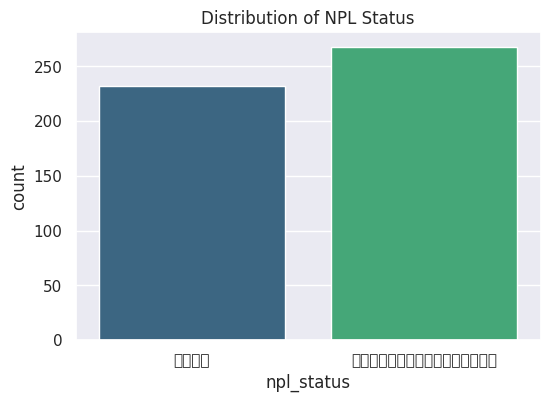

In [63]:
# 1. การกระจายตัวของสถานะ NPL
plt.figure(figsize=(6,4))
sns.countplot(x='npl_status', data=df, palette='viridis')
plt.title('Distribution of NPL Status')
plt.show()

findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg'

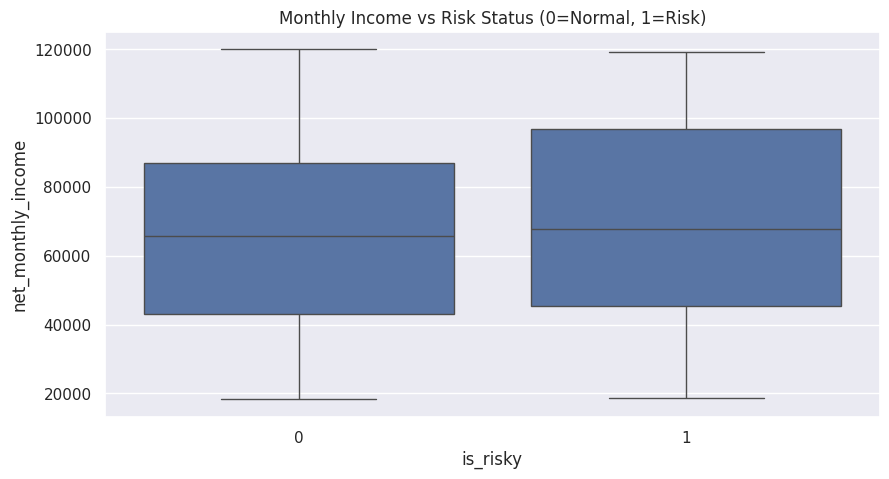

In [64]:
# 2. ดูความสัมพันธ์ระหว่างรายได้กับความเสี่ยง
df['is_risky'] = df['npl_status'].apply(lambda x: 1 if x != 'ปกติ' else 0)
plt.figure(figsize=(10,5))
sns.boxplot(x='is_risky', y='net_monthly_income', data=df)
plt.title('Monthly Income vs Risk Status (0=Normal, 1=Risk)')
plt.show()

findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg'

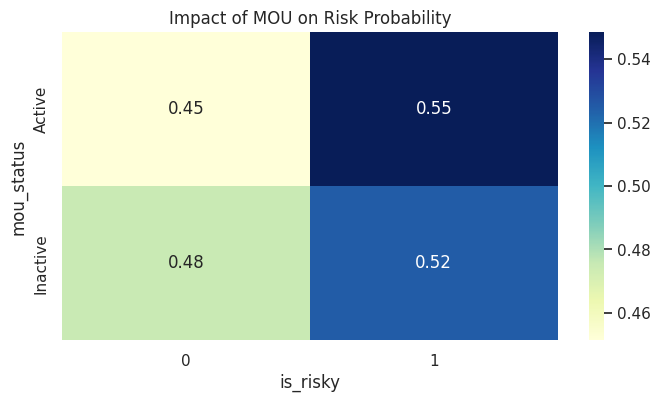

In [65]:
# 3. ความสำคัญของ MOU และการหักเงินเดือน
plt.figure(figsize=(8,4))
sns.heatmap(pd.crosstab(df['mou_status'], df['is_risky'], normalize='index'), annot=True, cmap='YlGnBu')
plt.title('Impact of MOU on Risk Probability')
plt.show()

Cell 3: Preprocessing

In [66]:
# สร้างตัวแปรใหม่และเลือก Features
df['dti_ratio'] = df['yearly_debt_payments'] / df['net_yearly_income']
df['is_risky'] = df['npl_status'].apply(lambda x: 1 if x != 'ปกติ' else 0)

features = [
    'net_monthly_income',
    'dti_ratio',
    'credit_limit_used_pct',
    'prev_defaults',
    'account_tenure_months',
    'occupation_type',
    'mou_status',
    'payroll_deduction_consent'
]

X = df[features].copy()
y = df['is_risky']

# เก็บค่าเฉลี่ย/ฐานนิยมไว้ใช้กับเครื่องคำนวณ (กรณี User ไม่กรอกข้อมูล)
le_dict = {}
cat_defaults = {}

for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le
    cat_defaults[col] = df[col].mode()[0]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling สำหรับ Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/var/folders/by/j89gc0qj6_zfzkf42sg0dr1c0000gp/T/ipykernel_7063/1286635932.py:23: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in X.select_dtypes(include='object').columns:


Cell 4: Training Models

In [67]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_scaled, y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Cell 5: Evaluation & Feature Importance

findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg' not found.
findfont: Font family 'Thai lwg'

XGBoost Accuracy Report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.61        49
           1       0.62      0.61      0.61        51

    accuracy                           0.61       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.61      0.61      0.61       100



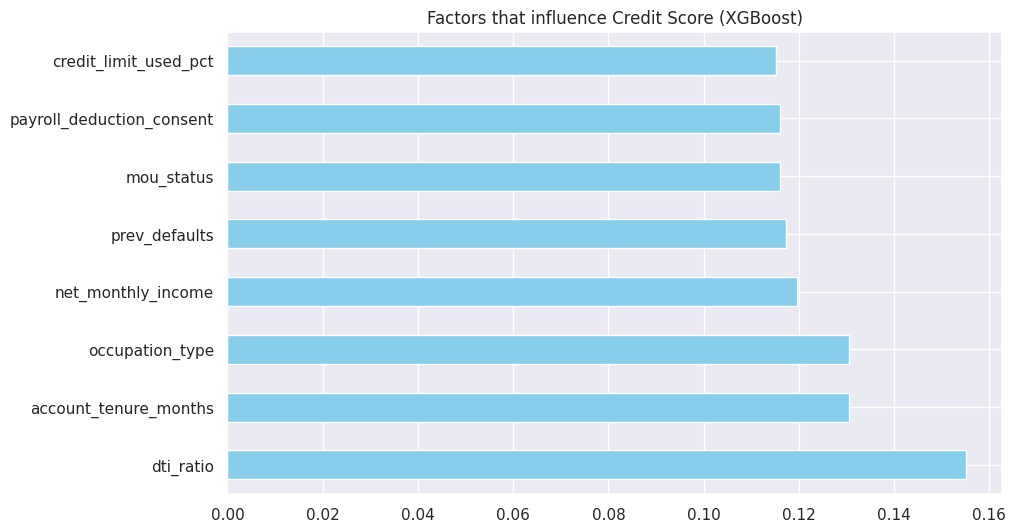

In [69]:
# วัดความแม่นยำ
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy Report:\n", classification_report(y_test, y_pred_xgb))

# ดูกราฟปัจจัยสำคัญ (Feature Importance)
plt.figure(figsize=(10,6))
feat_importances = pd.Series(xgb_model.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Factors that influence Credit Score (XGBoost)')
plt.show()

Cell 6: The Final Calculator (FICO-like Engine)

In [70]:
# ==================================================
# PART 6: The Final Credit Evaluation Engine
# ==================================================

def normalize_yes_no(val):
    if not val:
        return 'N'
    val = val.strip().lower()

    yes_words = ['y', 'yes', 'มี', 'ได้', 'true', '1']
    no_words  = ['n', 'no', 'ไม่มี', 'ไม่ได้', 'false', '0']

    if val in yes_words:
        return 'Y'
    if val in no_words:
        return 'N'
    return 'N'

def to_int(x):
    return int(re.sub(r"\D", "", str(x))) if x else 0

def get_risk_probability(input_dict):
    X_input = pd.DataFrame([input_dict])
    for col, le in le_dict.items():
        X_input[col] = le.transform(X_input[col])
    prob_xgb = xgb_model.predict_proba(X_input)[0][1]
    prob_log = log_model.predict_proba(scaler.transform(X_input))[0][1]
    return (prob_xgb + prob_log) / 2
                
    # คำนวณความน่าจะเป็นจากทั้ง 2 โมเดล
    prob_xgb = xgb_model.predict_proba(X_input)[0][1]
    
    # สำหรับ Logistic ต้อง Scale ข้อมูลก่อน
    X_input_scaled = scaler.transform(X_input)
    prob_log = log_model.predict_proba(X_input_scaled)[0][1]
    
    # คืนค่าเฉลี่ยความเสี่ยง
    return (prob_xgb + prob_log) / 2

def get_credit_evaluation(income, existing_debt, tenure, age, mou, payroll):
    income = int(income)
    existing_debt = int(existing_debt)
    tenure = int(tenure)
    age = int(age)

    ml_input = {
        "net_monthly_income": income,
        "dti_ratio": existing_debt / income if income > 0 else 0,
        "credit_limit_used_pct": 0.5,
        "prev_defaults": 0,
        "account_tenure_months": tenure,
        "occupation_type": cat_defaults['occupation_type'],
        "mou_status": mou if mou in le_dict['mou_status'].classes_ else cat_defaults['mou_status'],
        "payroll_deduction_consent": payroll if payroll in le_dict['payroll_deduction_consent'].classes_ else cat_defaults['payroll_deduction_consent']
    }

    risk_prob = get_risk_probability(ml_input)

# ----- FICO-like Logic Score (0–850) -----

    logic_score = 0
    # 1. Payment History (35%)
    logic_score += 0.35 * (1 - ml_input['prev_defaults']/1) * 850
    # 2. Amounts Owed / DTI (30%)
    dti_score = max(0, 1 - (existing_debt / income))
    logic_score += 0.30 * dti_score * 850
    # 3. Length of Credit History (15%)
    tenure_score = min(tenure / 120, 1)
    logic_score += 0.15 * tenure_score * 850
    # 4. Credit Mix (10%)
    mix_score = 0.5
    if mou == 'Y':
        mix_score += 0.3
    if payroll == 'Y':
        mix_score += 0.2
    logic_score += 0.10 * min(mix_score,1) * 850
    # 5. New Credit / Inquiries (10%)
    new_credit_score = 0.8
    logic_score += 0.10 * new_credit_score * 850

    logic_score = min(int(logic_score), 850)

    # ----- ML Score -----
    ml_score = int((1 - risk_prob) * 400) + 450

    # ----- Hybrid FICO-like Score -----
    final_score = int(0.6 * logic_score + 0.4 * ml_score)

    # ----- Grade Mapping -----
    if final_score >= 800:
        grade, status, mult, rate = "AAA", "🟢 ยอดเยี่ยม", 7, 7.49
    elif final_score >= 740:
        grade, status, mult, rate = "AA", "🟢 ดีมาก", 6, 8.00
    elif final_score >= 670:
        grade, status, mult, rate = "A", "🟢 ดี", 5, 8.50
    elif final_score >= 580:
        grade, status, mult, rate = "BBB", "🟡 ปานกลาง", 3, 10.00
    elif final_score >= 500:
        grade, status, mult, rate = "BB", "🟠 พอใช้", 1.5, 12.00
    else:
        grade, status, mult, rate = "C", "🔴 เสี่ยงสูง", 0, 0.00

    loan_term = 60
    is_approve = True
    reason = None

    if income < 20000 or tenure < 12 or grade == "C":
        is_approve = False
        reason = "ไม่ผ่านเกณฑ์ขั้นต่ำหรือความเสี่ยงสูงเกินไป"

    max_loan = income * mult
    installment = ((max_loan * (rate / 100) * (loan_term / 12)) + max_loan) / loan_term if is_approve else 0
    dsr = (existing_debt + installment) / income if income > 0 else 0
    remaining = income - existing_debt - installment

    return {
        "decision": "✅ อนุมัติ" if is_approve else "❌ ปฏิเสธ",
        "reason": reason,
        "1. คะแนนเครดิต": {
            "Hybrid Score": f"{final_score} / 850",
            "Grade": grade,
            "Status": status
        },
        "2. เงื่อนไขสินเชื่อ": {
            "วงเงินอนุมัติสูงสุด": f"{max_loan:,.0f} บาท",
            "ระยะเวลา": f"{loan_term} เดือน",
            "ค่างวดประมาณการ": f"{installment:,.2f} บาท/เดือน",
            "อัตรากำไร": f"{rate:.2f}%"
        } if is_approve else "ไม่ผ่านเกณฑ์",
        "3. ความสามารถผ่อน": {
            "DSR รวม": f"{dsr*100:.2f}%",
            "เงินเหลือหลังผ่อน": f"{remaining:,.0f} บาท",
            "อายุเมื่อผ่อนจบ": f"{age + loan_term/12:.1f} ปี"
        } if is_approve else "N/A"
    }


In [71]:

def print_user_summary(report):
    print("\n" + "=" * 55)
    print(f"ผลการพิจารณา: {report['decision']}")
    print("=" * 55)

    if report["decision"].startswith("❌"):
        print(f"เหตุผล: {report['reason']}")
        print("=" * 55)
        return

    score = report["1. คะแนนเครดิต"]
    loan = report["2. เงื่อนไขสินเชื่อ"]
    ability = report["3. ความสามารถผ่อน"]

    print("\n1. ข้อมูลคะแนน")
    print(f"  - Credit Score: {score['Hybrid Score']}")
    print(f"  - เกรด (Grade): {score['Grade']}")
    print(f"  - สถานะ (Status): {score['Status']}")

    print("\n2. รายละเอียดวงเงิน")
    print(f"  - วงเงินอนุมัติสูงสุด: {loan['วงเงินอนุมัติสูงสุด']}")
    print(f"  - ระยะเวลาผ่อน: {loan['ระยะเวลา']}")
    print(f"  - ค่างวดหนี้ใหม่: {loan['ค่างวดประมาณการ']}")
    print(f"  - อัตรากำไรสุทธิ: {loan['อัตรากำไร']} ต่อปี")

    print("\n3. วิเคราะห์ความสามารถ")
    print(f"  - Total DSR: {ability['DSR รวม']}")
    print(f"  - เงินเหลือใช้หลังหักหนี้: {ability['เงินเหลือหลังผ่อน']}")
    print(f"  - อายุผู้กู้เมื่อผ่อนจบ: {ability['อายุเมื่อผ่อนจบ']}")

    print("=" * 55)

In [72]:
def run_test_case(รายได้สุทธิต่อเดือน, ภาระหนี้เดิมต่อเดือน, อายุงาน_เดือน, อายุผู้กู้, มี_MOU, หักเงินเดือน):
    # ปรับ Format Input
    mou = normalize_yes_no(มี_MOU)
    payroll = normalize_yes_no(หักเงินเดือน)
    
    report = get_credit_evaluation(
        รายได้สุทธิต่อเดือน, 
        ภาระหนี้เดิมต่อเดือน, 
        อายุงาน_เดือน, 
        อายุผู้กู้, 
        mou, 
        payroll
    )
    print_user_summary(report)

# ==================================================
# TEST EXECUTION
# ==================================================
run_test_case(
    รายได้สุทธิต่อเดือน=45000,
    ภาระหนี้เดิมต่อเดือน=5000,
    อายุงาน_เดือน=36,
    อายุผู้กู้=35,
    มี_MOU="มี",
    หักเงินเดือน="ได้"
)


ผลการพิจารณา: ✅ อนุมัติ

1. ข้อมูลคะแนน
  - Credit Score: 735 / 850
  - เกรด (Grade): A
  - สถานะ (Status): 🟢 ดี

2. รายละเอียดวงเงิน
  - วงเงินอนุมัติสูงสุด: 225,000 บาท
  - ระยะเวลาผ่อน: 60 เดือน
  - ค่างวดหนี้ใหม่: 5,343.75 บาท/เดือน
  - อัตรากำไรสุทธิ: 8.50% ต่อปี

3. วิเคราะห์ความสามารถ
  - Total DSR: 22.99%
  - เงินเหลือใช้หลังหักหนี้: 34,656 บาท
  - อายุผู้กู้เมื่อผ่อนจบ: 40.0 ปี
